### Student Information
Name: Kelvin Claudio

Student ID: 112006266

GitHub ID: kelvinclaudio
https://github.com/kelvinclaudio

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [3]:
import os, re, random, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# keep only needed columns and rename for consistency
cols = [c for c in df.columns if c.lower() in {"text", "label"}]
df = df[cols].rename(columns={cols[0]: "text", cols[1]: "label"})

# clean up text and basic stats
df["text"] = df["text"].astype(str).str.replace(r"\s+", " ", regex=True).str.strip()
df["n_words"] = df["text"].str.split().str.len().fillna(0)
df["n_chars"] = df["text"].str.len().fillna(0)

# readable labels
label_map = {-1: "negative", 0: "neutral", 1: "positive"}
df["label_name"] = df["label"].map(label_map).fillna(df["label"].astype(str))

print("Loaded", len(df), "rows")
df.head(3)


Loaded 847 rows


,text,label,n_words,n_chars,label_name
0,Calls on retards,-1.0,3,16,negative
1,Stunt as in like why did they even make a big ...,0.0,27,137,neutral
2,Seeing lots of red in the ticker.,0.0,7,33,neutral


In [4]:
for i, txt in enumerate(df["text"].head(3), start=1):
    print(f"[Sample {i}]")
    print(txt)
    print("-" * 70)


[Sample 1]
Calls on retards
----------------------------------------------------------------------
[Sample 2]
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
----------------------------------------------------------------------
[Sample 3]
Seeing lots of red in the ticker.
----------------------------------------------------------------------


In [5]:
#posts mentioning finance keywords
ex1 = df[df["text"].str.contains(r"\bstock|market|share\b", case=False, na=False)]
print("Posts about stocks/market:\n", ex1["text"].head(2).to_string(index=False))

#long posts that don’t mention 'error' or 'bug'
ex2 = df[(df["n_words"] > 100) & (~df["text"].str.contains(r"\berror|bug\b", case=False, na=False))]
print("\nLong posts without 'error' or 'bug':\n", ex2[["text", "n_words"]].head(2))

#posts > 500 chars and under 200 words mentioning analyst or earnings
ex3 = df.query("n_chars > 500 and n_words < 200")
ex3 = ex3[ex3["text"].str.contains(r"\b(analyst|earnings)\b", case=False, na=False)]
print("\nFocused financial posts:\n", ex3[["text", "n_chars", "n_words"]].head(2))


Posts about stocks/market:
 So they went from saying redditors are bad for ...
So they went from saying redditors are bad for ...

Long posts without 'error' or 'bug':
                                                  text  n_words
3   Vision Marine Technologies Inc. is rewriting t...      159
17  Exactly this. Trump will blink first because, ...      112

Focused financial posts:
 Empty DataFrame
Columns: [text, n_chars, n_words]
Index: []


C:\Users\Kelvin\AppData\Local\Temp\ipykernel_4124\4292043240.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ex3 = ex3[ex3["text"].str.contains(r"\b(analyst|earnings)\b", case=False, na=False)]


In [6]:
subset = df[df["label_name"] == "positive"]
step = max(len(subset)//5, 1)
for i, (_, row) in enumerate(subset.iloc[::step].head(5).iterrows(), 1):
    print(f"Positive example {i}:\n{row['text'][:300]}\n{'-'*60}")


Positive example 1:
Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with To
------------------------------------------------------------
Positive example 2:
Just stumbled upon some exciting news about Star Navigation Systems Group Ltd. (CSE: SNA) and their cutting-edge Inflight Safety Monitoring System. As someone who's always fascinated by modern aviation technology, I couldn't help but feel bullish about the potential of Star's solutions in optimizing
------------------------------------------------------------
Positive example 3:
Mostly in MSTR calls, AAPL puts and GBTC long.
------------------------------------------------------------
Positive example 4:
Go with the flow if you wanna make money..for the next 4 years.
------------------------

In [7]:
missing = df[df.isna().any(axis=1)]
print("Rows with missing values:", len(missing))
missing.head()

Rows with missing values: 0


,text,label,n_words,n_chars,label_name


In [8]:
df_sample = df.sample(n=min(1000, len(df)), random_state=7)

print("len(df)     =", len(df))
print("len(sample) =", len(df_sample))
print("Columns identical:", list(df.columns) == list(df_sample.columns))
print("Sample index preview:", list(df_sample.index[:8]))


len(df)     = 847
len(sample) = 847
Columns identical: True
Sample index preview: [385, 740, 817, 205, 809, 283, 389, 706]


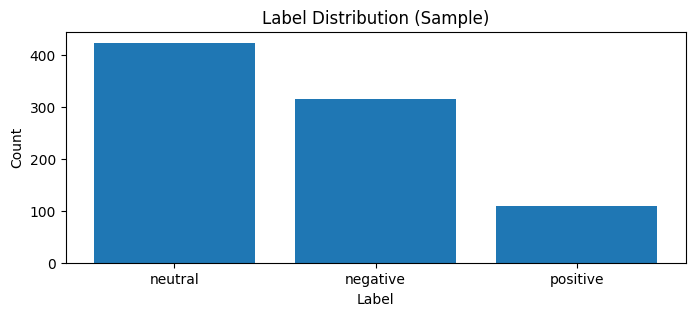

In [9]:
counts = df_sample["label_name"].value_counts()
plt.figure(figsize=(8,3))
plt.bar(counts.index, counts.values)
plt.title("Label Distribution (Sample)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


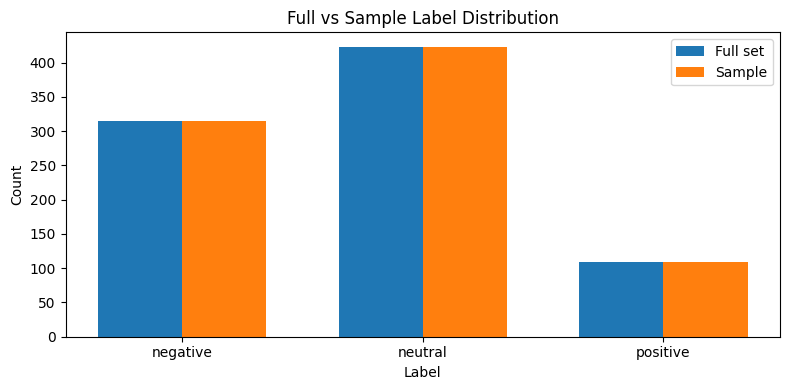

In [10]:
full = df["label_name"].value_counts().sort_index()
samp = df_sample["label_name"].value_counts().sort_index()

cats = sorted(set(full.index).union(samp.index))
x = np.arange(len(cats))
w = 0.35

plt.figure(figsize=(8,4))
plt.bar(x - w/2, [full.get(c,0) for c in cats], width=w, label="Full set")
plt.bar(x + w/2, [samp.get(c,0) for c in cats], width=w, label="Sample")
plt.xticks(x, cats)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Full vs Sample Label Distribution")
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
def analyze(text):
    tokens = re.findall(r"[a-zA-Z']+", text.lower())
    return pd.Series(tokens).value_counts().head(20)

rid = random.randint(0, len(df)-1)
print("Random doc id:", rid)
analyze(df.at[rid, "text"])


Random doc id: 800


a               2
product         2
the             2
to              2
is              2
what            2
i               2
you             1
but             1
would           1
easily          1
able            1
unremarkable    1
pretty          1
it's            1
exact           1
find            1
be              1
company         1
said            1
Name: count, dtype: int64

In [12]:
cv = CountVectorizer(min_df=3, max_df=0.7)
X_counts = cv.fit_transform(df["text"])
vocab = cv.get_feature_names_out()
print("Shape of matrix:", X_counts.shape)


Shape of matrix: (847, 1099)


In [13]:
doc_id = 5
row = X_counts.getrow(doc_id)
terms = vocab[row.indices]
print("Terms in document:", terms[:50])


Terms in document: ['in' 'to' 'me']


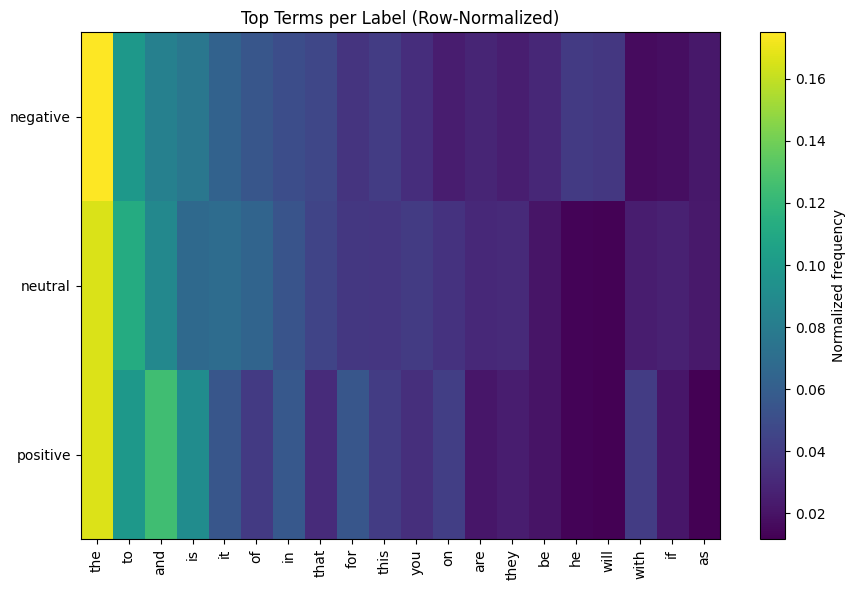

In [14]:
M = pd.DataFrame.sparse.from_spmatrix(X_counts, columns=vocab)
M["label_name"] = df["label_name"]
agg = M.groupby("label_name").sum()

top = agg.sum().sort_values(ascending=False).head(20).index
Z = agg[top]
Z = Z.div(Z.sum(axis=1), axis=0).fillna(0)

plt.figure(figsize=(9,6))
plt.imshow(Z.values, aspect="auto", interpolation="nearest")
plt.colorbar(label="Normalized frequency")
plt.yticks(range(len(Z.index)), Z.index)
plt.xticks(range(len(Z.columns)), Z.columns, rotation=90)
plt.title("Top Terms per Label (Row-Normalized)")
plt.tight_layout()
plt.show()


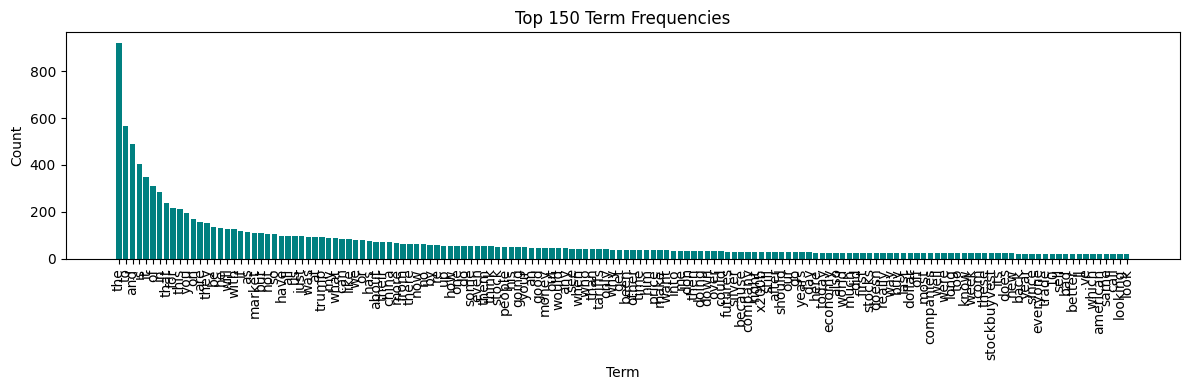

In [15]:
freq = np.asarray(X_counts.sum(axis=0)).ravel()
idx = freq.argsort()[::-1][:150]
terms = vocab[idx]
vals = freq[idx]

plt.figure(figsize=(12,4))
plt.bar(range(len(vals)), vals, color="teal")
plt.xticks(range(len(vals)), terms, rotation=90)
plt.title("Top 150 Term Frequencies")
plt.xlabel("Term")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


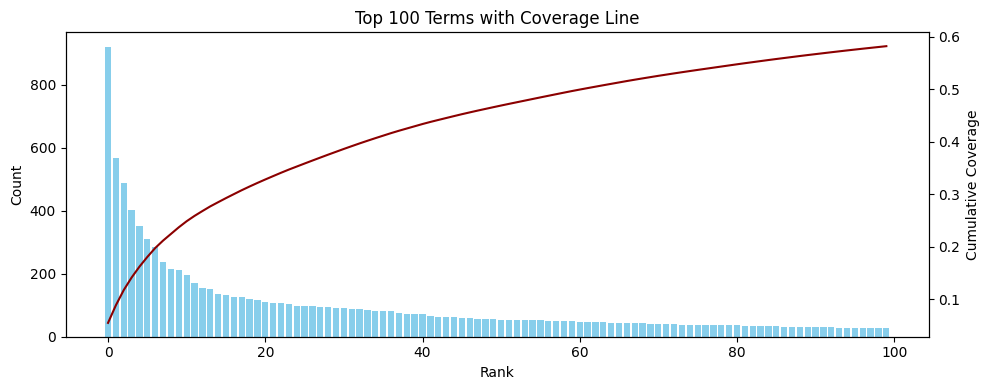

In [16]:
N = 100
f = np.asarray(X_counts.sum(axis=0)).ravel()
idx = f.argsort()[::-1][:N]
vals = f[idx]
coverage = vals.cumsum()/f.sum()

fig, ax1 = plt.subplots(figsize=(10,4))
ax1.bar(range(N), vals, color="skyblue")
ax2 = ax1.twinx()
ax2.plot(range(N), coverage, color="darkred")
ax1.set_xlabel("Rank")
ax1.set_ylabel("Count")
ax2.set_ylabel("Cumulative Coverage")
plt.title(f"Top {N} Terms with Coverage Line")
plt.tight_layout()
plt.show()


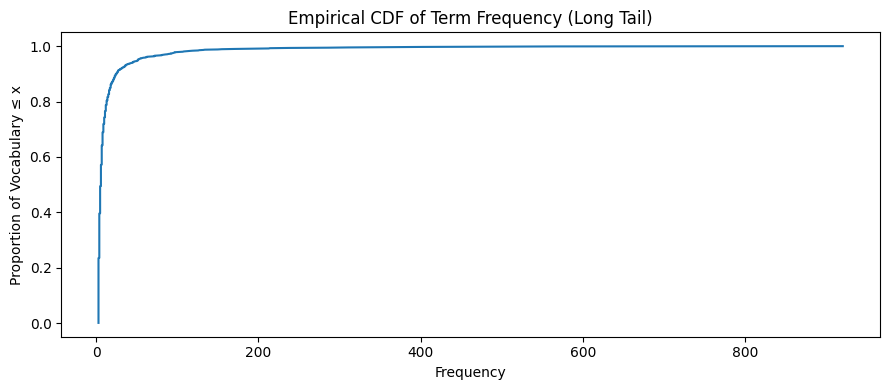

In [17]:
f = np.asarray(X_counts.sum(axis=0)).ravel()
f_sorted = np.sort(f)
y = np.arange(1, len(f_sorted)+1)/len(f_sorted)

plt.figure(figsize=(9,4))
plt.plot(f_sorted, y)
plt.title("Empirical CDF of Term Frequency (Long Tail)")
plt.xlabel("Frequency")
plt.ylabel("Proportion of Vocabulary ≤ x")
plt.tight_layout()
plt.show()


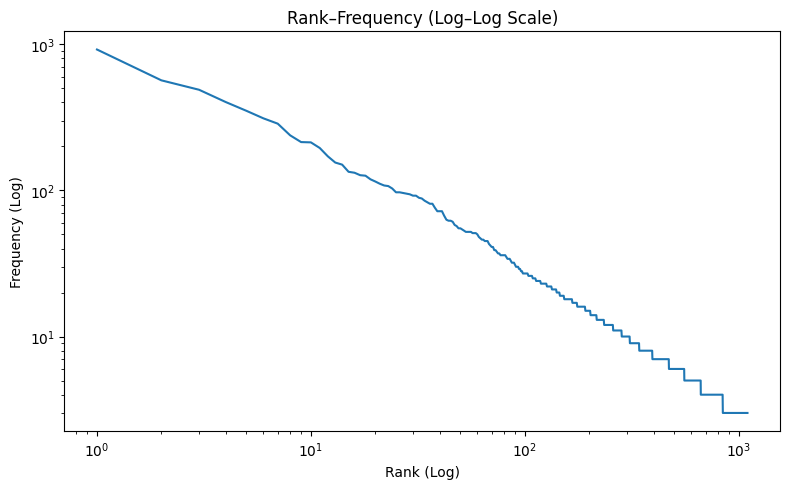

In [18]:
f = np.asarray(X_counts.sum(axis=0)).ravel()
ranked = np.sort(f)[::-1]
ranks = np.arange(1, len(ranked)+1)

plt.figure(figsize=(8,5))
plt.plot(ranks, ranked)
plt.xscale("log")
plt.yscale("log")
plt.title("Rank–Frequency (Log–Log Scale)")
plt.xlabel("Rank (Log)")
plt.ylabel("Frequency (Log)")
plt.tight_layout()
plt.show()


Extra Meaningful Visualizations

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_4124\4060706472.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(df["label_name"].unique()), showfliers=False)


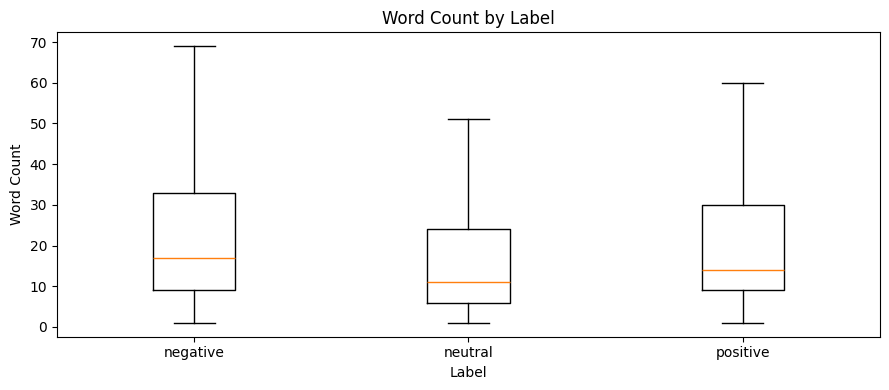

In [19]:
# Word Count per Label (Boxplot)

groups = [df.loc[df["label_name"]==lab, "n_words"].values for lab in sorted(df["label_name"].unique())]
plt.figure(figsize=(9,4))
plt.boxplot(groups, labels=sorted(df["label_name"].unique()), showfliers=False)
plt.title("Word Count by Label")
plt.xlabel("Label")
plt.ylabel("Word Count")
plt.tight_layout()
plt.show()


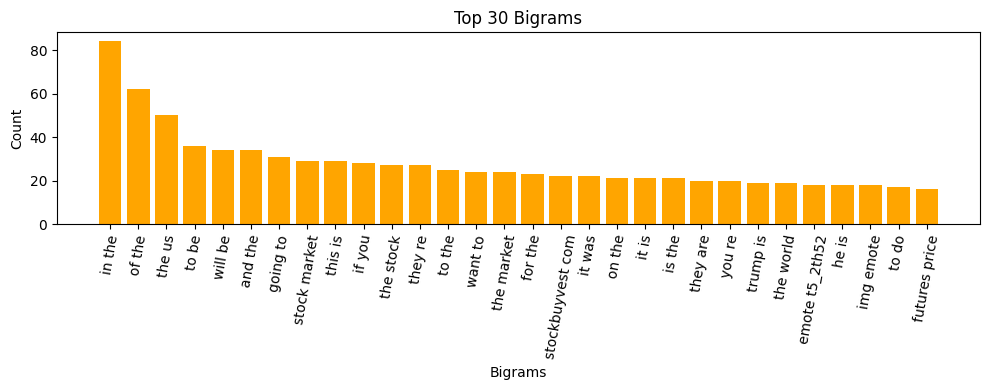

In [20]:
#Top Bigrams

bi = CountVectorizer(ngram_range=(2,2), min_df=3, max_df=0.8)
B = bi.fit_transform(df["text"])
bi_terms = bi.get_feature_names_out()
bi_freq = np.asarray(B.sum(axis=0)).ravel()
idx = bi_freq.argsort()[::-1][:30]

plt.figure(figsize=(10,4))
plt.bar(range(len(idx)), bi_freq[idx], color="orange")
plt.xticks(range(len(idx)), bi_terms[idx], rotation=80)
plt.title("Top 30 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [21]:
# Top 10 TF-IDF Terms per Label

tfidf = TfidfVectorizer(min_df=3, max_df=0.7)
T = tfidf.fit_transform(df["text"])
terms = tfidf.get_feature_names_out()
T_df = pd.DataFrame.sparse.from_spmatrix(T, columns=terms)
T_df["label_name"] = df["label_name"]

print("Top 10 TF-IDF terms per label:")
for lab, grp in T_df.groupby("label_name"):
    top = grp.drop(columns=["label_name"]).mean().sort_values(ascending=False).head(10)
    print(f"  {lab:>8}: ", ", ".join(top.index))

Top 10 TF-IDF terms per label:
  negative:  the, to, is, and, it, he, in, that, of, this
   neutral:  the, to, it, and, is, of, in, that, you, for
  positive:  the, to, and, is, it, good, for, on, this, up


The End

# Phase 2

In [ ]:
### Begin Assignment Here

# Data Preparation
df = pd.read_csv("newdataset\Reddit-stock-sentiment.csv")

# Keep relevant columns
df = df[['datetime', 'subreddit', 'title', 'text', 'upvotes', 'subjectivity', 'polarity', 'sentiment', 'label']].copy()

# Check the properties and the first entries
print(df.shape)
print(df.head())